In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import scipy.signal as signal
import skimage.io
import skimage.metrics
import tensorflow as tf

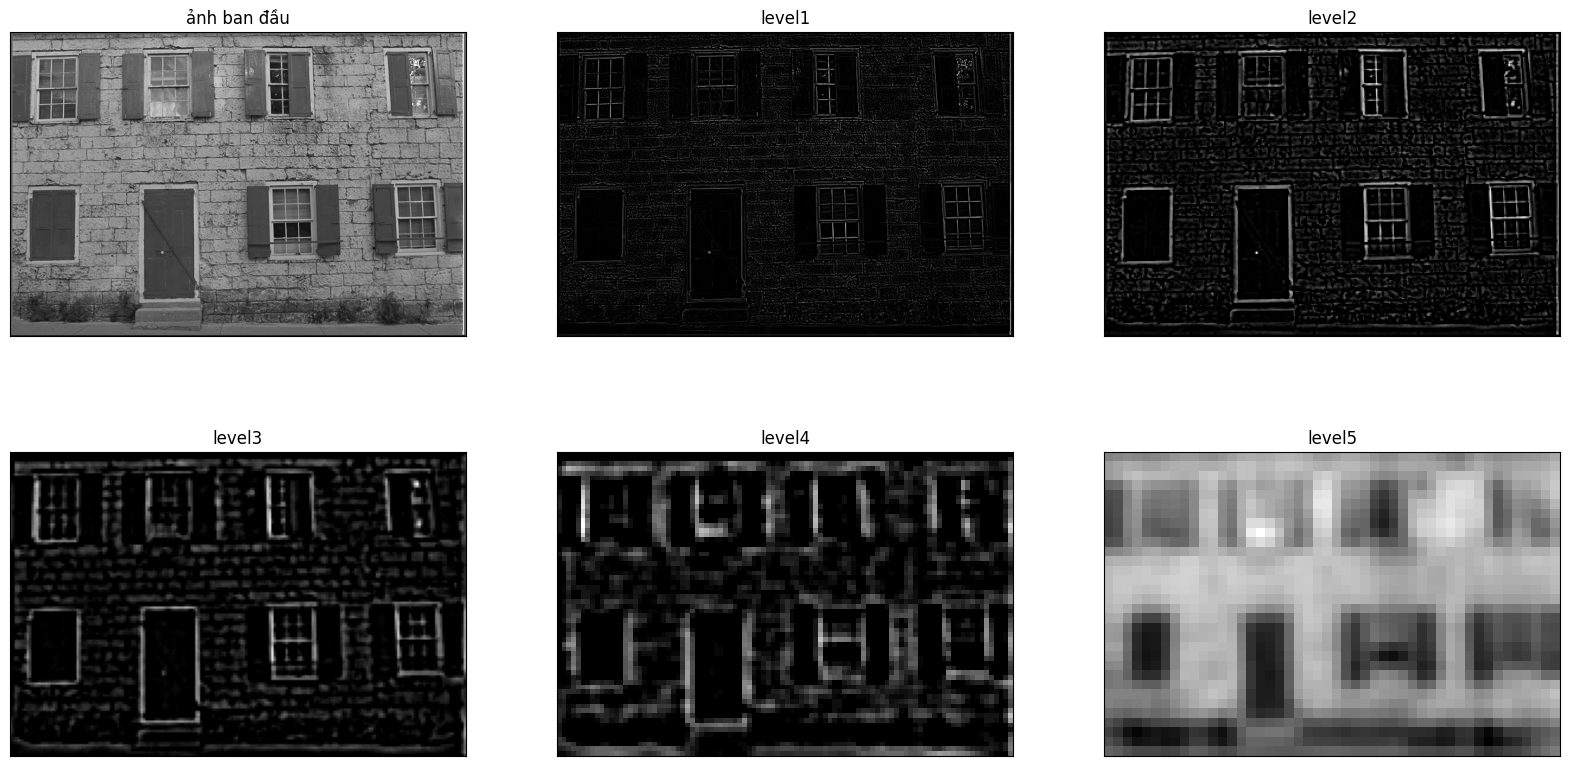

In [ ]:
def show_im(title,img):
    figsize = (10, 10)
    plt.figure(figsize=figsize)
    plt.imshow(img,cmap='gray')
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()
# Định nghĩa bộ lọc 1D
def filter_1D(a):
    h = np.array([[0.25 - a/2,0.25, a, 0.25, 0.25 - a/2]]).astype(float)
    return h

def plot_images(images,img):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
    j=1
    for i, ax in enumerate(axes.flatten()):
      if i==0:
        ax.imshow(img,cmap="gray")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title("ảnh ban đầu")


      else :
        i=i-1
        ax.imshow(images[i],cmap="gray")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title("level"+str(j))
        j=j+1
    plt.show()

# Định nghĩa bộ lọc 2D
def filter_2D(a):
    h = filter_1D(a)
    H= np.transpose(h)
    W = np.outer(H,h)
    return W.astype(float)

def Gaussian_pyramid(img,N):
    G = [img]
    for i in range(level-1):
      # Lọc ảnh bằng bộ lọc 2D
      W = filter_2D(a)
      G_i = cv2.filter2D(G[i], -1, W)
      # Lấy mẫu xuống
      G_i_down =cv2.pyrDown(G_i)
      # Thêm G_i xuống danh sách Gaussian pyramid
      G.append(G_i_down)
    return G

def Laplacian_pyramid(G,level):
    # Tạo Laplacian pyramid
    L = []
    for i in range(level-1):
        # Lấy mẫu lên
        G_i_up = cv2.pyrUp(G[i+1])
        # Tính Laplacian pyramid
        L_i = cv2.subtract(G[i], G_i_up)
        #Thêm L_i vào danh sách Laplacian pyramid
        L.append(L_i)
    L.append(G[level-1])

    return L

# Đọc ảnh đầu vào
img = cv2.imread('/content/gdrive/MyDrive/xử lý ảnh/giữa kỳ xla/kodak database/kodim01.png', 0)

# Định nghĩa số mức của Gaussian pyramid
level = 5

# Định nghĩa hệ số a
a = 0.4

# Tạo Gaussian pyramid
G = Gaussian_pyramid(img,level)
L=  Laplacian_pyramid(G,level)

plot_images(L,img)


In [ ]:
print(filter_2D(a))

[[0.0025 0.0125 0.02   0.0125 0.0025]
 [0.0125 0.0625 0.1    0.0625 0.0125]
 [0.02   0.1    0.16   0.1    0.02  ]
 [0.0125 0.0625 0.1    0.0625 0.0125]
 [0.0025 0.0125 0.02   0.0125 0.0025]]


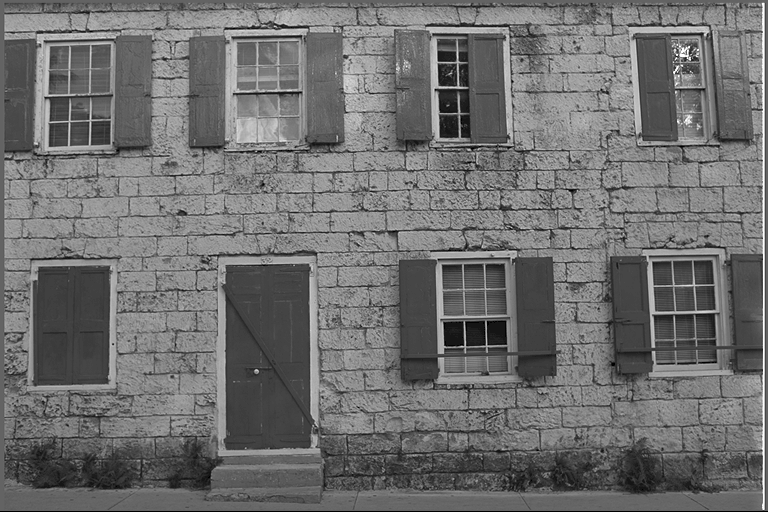

In [ ]:
laplacian_pyr = L
num_levels = len(laplacian_pyr)
reconstructed_img = laplacian_pyr[num_levels-1]


for i in range(num_levels-2, -1, -1):
    upsampled_img = cv2.pyrUp(reconstructed_img)
    reconstructed_img = cv2.add(upsampled_img, laplacian_pyr[i])

#cv2_imshow(reconstructed_img)
cv2_imshow(img)

In [ ]:
def get_PSNR(img,img2,i):
    print(skimage.metrics.peak_signal_noise_ratio(img, img2),"PSNR anh"+str(i))

In [ ]:
print(skimage.metrics.peak_signal_noise_ratio(img, reconstructed_img),"PSNR anh")

22.556331347969447 PSNR anh
